In [19]:
import math
import time

import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import medfilt, butter, filtfilt
from sklearn.decomposition import PCA

import utils

%matplotlib inline

In [3]:
def whiten(X,fudge=1E-18):
    # the matrix X should be observations-by-components

    # get the covariance matrix
    Xcov = np.dot(X.T,X)

    # eigenvalue decomposition of the covariance matrix
    d, V = np.linalg.eigh(Xcov)

    # a fudge factor can be used so that eigenvectors associated with
    # small eigenvalues do not get overamplified.
    D = np.diag(1. / np.sqrt(d+fudge))

    # whitening matrix
    W = np.dot(np.dot(V, D), V.T)

    # multiply by the whitening matrix
    X_white = np.dot(X, W)

    return X_white, W

https://www.gw-openscience.org/s/events/GW150914/GW150914_tutorial.html

In [ ]:
# def whiten(strain, interp_psd, dt):
#     Nt = len(strain)
#     freqs = np.fft.rfftfreq(Nt, dt)

#     # whitening: transform to freq domain, divide by asd, then transform back, 
#     # taking care to get normalization right.
#     hf = np.fft.rfft(strain)
#     white_hf = hf / (np.sqrt(interp_psd(freqs) /dt/2.))
#     white_ht = np.fft.irfft(white_hf, n=Nt)
#     return white_ht

In [4]:
star = 'X0319'
PATH = f'spectra/{star}/'

In [5]:
obs_flux, obs_wl = utils.get_spectrum_data_and_wavelength(file=PATH + 'X0319_V_O_E.fits')
tel_flux, tel_wl = utils.get_spectrum_data_and_wavelength(file=PATH + 'X0319_V_O_E_TRA.fits')
corr_flux, corr_wl = utils.get_spectrum_data_and_wavelength(file=PATH + 'X0319_V_O_E_TAC_final.fits')

In [6]:
# indexes on flux array that represent the interval of 850 to 880 nm
START = 21089
END = 23090

In [7]:
cut_flux = obs_flux[START: END]
cut_wl = obs_wl[START: END]

cut_tel_flux = tel_flux[START: END]
cut_tel_wl = tel_wl[START: END]

In [8]:
cut_flux = obs_flux
cut_wl = obs_wl

cut_tel_flux = tel_flux
cut_tel_wl = tel_wl

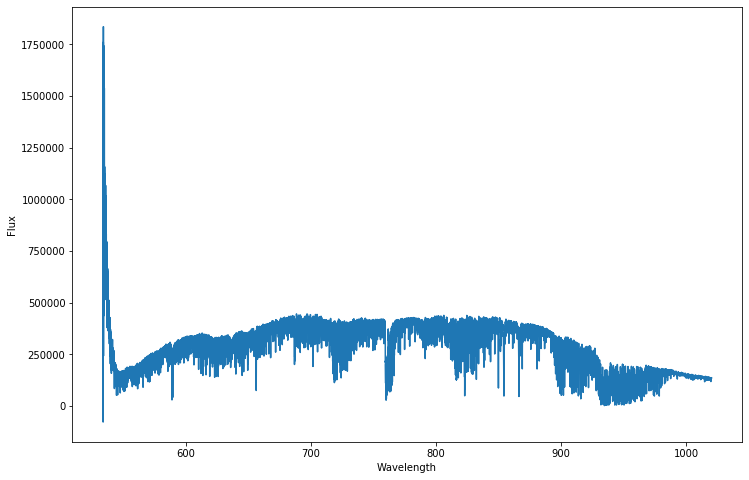

In [9]:
utils.plot_spectrum(cut_flux, cut_wl)

In [10]:
med_filter = medfilt(cut_flux)

In [11]:
white_filter = whiten(cut_flux.reshape(-1, 1))

Distance: 29069.477923772425
Are all warp path indices aligned? False


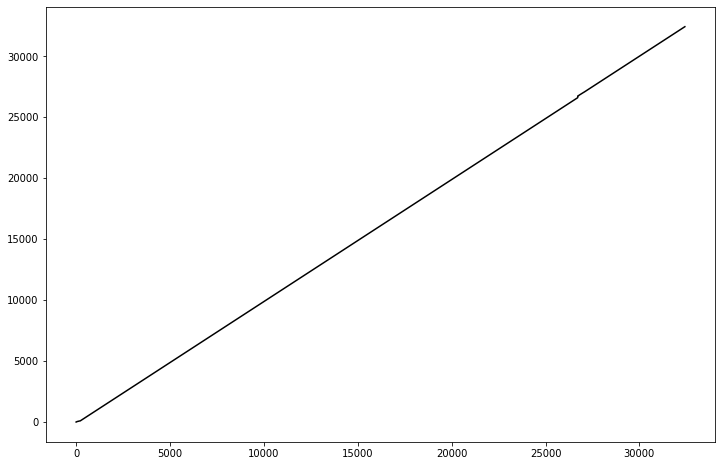

Elapsed time in seconds: 2.3770134449005127


In [12]:
start = time.time()

dtw_path = utils.fast_dtw_on_stellar_spectra(cut_tel_flux, white_filter[0])

end = time.time()
print('Elapsed time in seconds: {}'.format(end - start))

In [13]:
aligned_tel = utils.align_sequence_dtw_path(dtw_path, cut_tel_flux)

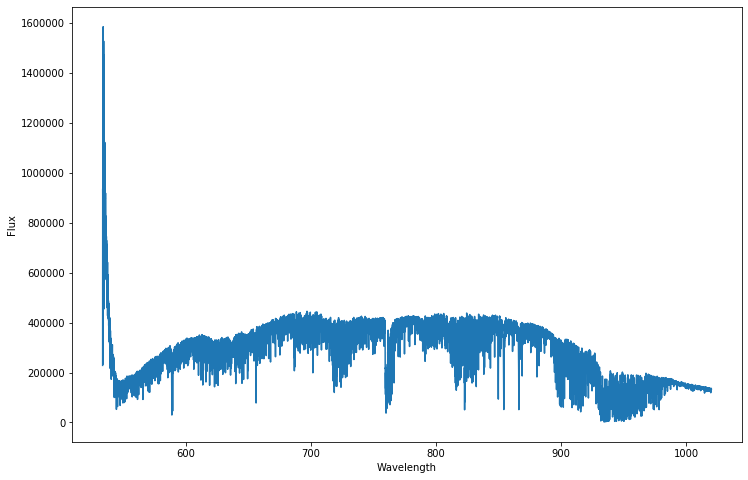

In [14]:
utils.plot_spectrum(med_filter, cut_wl)

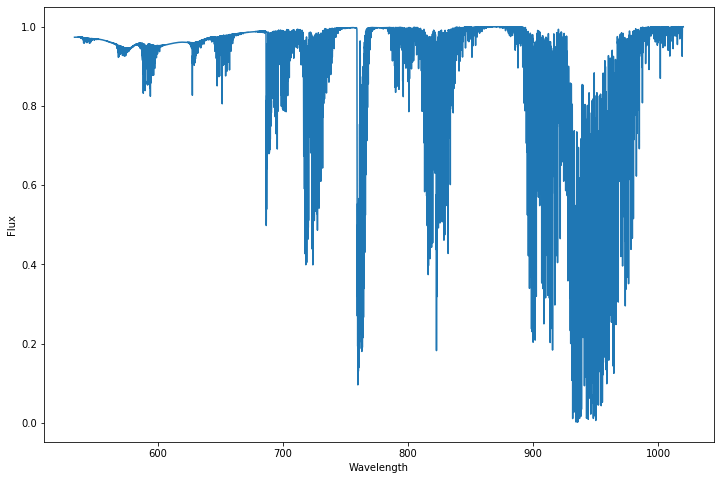

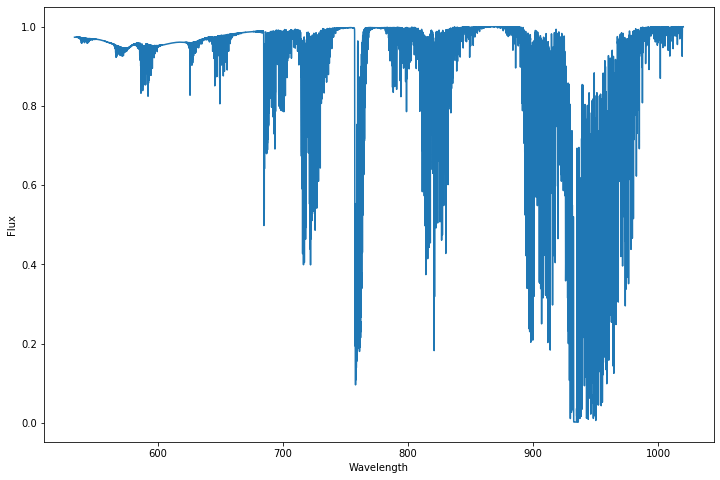

In [15]:
utils.plot_spectrum(cut_tel_flux, cut_tel_wl)
utils.plot_spectrum(aligned_tel, cut_tel_wl)

In [21]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [58]:
order = 2
fs = 30  # sample rate, Hz
cutoff = 0.1  # desired cutoff frequency of the filter, Hz

In [59]:
y = butter_highpass_filter(cut_tel_flux, cutoff, fs, order)

In [60]:
y

array([-3.34522477e-05, -3.18318605e-05, -3.04739503e-05, ...,
        1.52972663e-03,  1.40954181e-03,  1.28716586e-03])

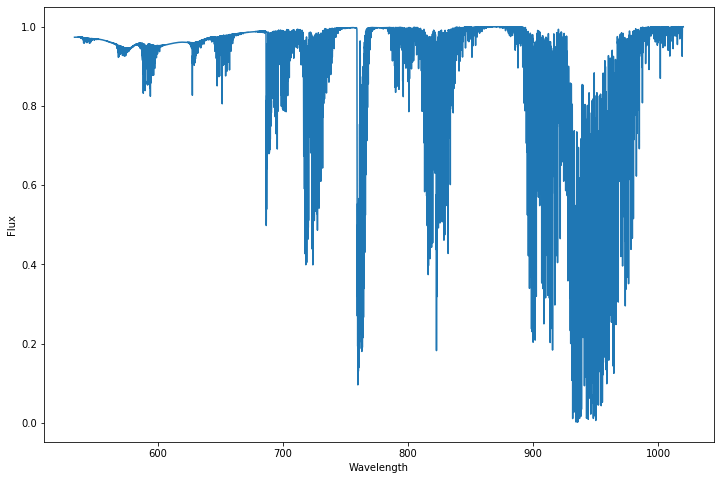

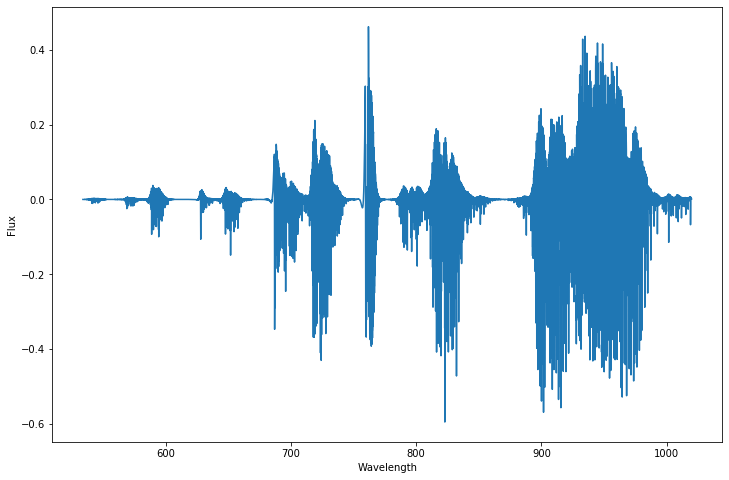

In [61]:
utils.plot_spectrum(cut_tel_flux, cut_tel_wl)
utils.plot_spectrum(y, cut_tel_wl)

In [39]:
cut_wl

array([ 533.67 ,  533.685,  533.7  , ..., 1019.97 , 1019.985, 1020.   ])